# TVA

In [1]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.outcomes import plurality_outcome
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
from src.Coalition_Compromising import find_stable_coalitions_by_compromising
import os
import numpy as np 
import pandas as pd

In [2]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

This is the voting input

In [3]:
voting = utils.read_voting(path_voting, table_name="voting5")
voting_table = voting.to_pandas()
voting_table

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


(7, 200)
None


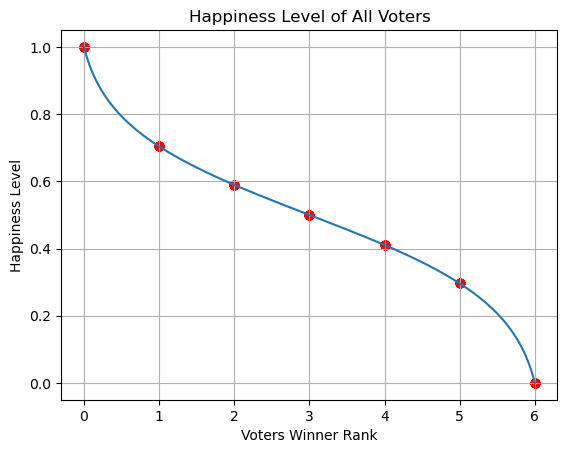

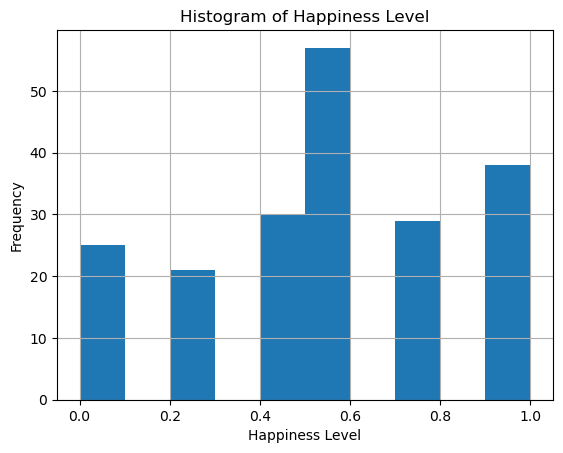

In [4]:
n_cand = 7
random_voting = utils.random_voting(200, n_cand)
print(random_voting.shape)
result_random = plurality_outcome(random_voting)
hlevel = HappinessLevel(random_voting, result_random.winner)
print(hlevel._all_happiness_level)
hlevel.plot()
hlevel.histogram()

## Strategic Voting

In [5]:
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


In [6]:
result = plurality_outcome(voting)
result

Winner: C
{'A': 1, 'B': 2, 'C': 3, 'D': 0}

Note that **voter 5** is the only voter that can engage in strategic voting. Voter 5 prefers $B$ over the winner $C$. Hence, they can increase their $\text{Happiness Level}$ by placing $B$ as their first preference, resulting in a tie between $C$ and $B$ in the voting outcome (for plurality, voting for two, Borda). Since ties are resolved in alphabetical order, $B$ wins over $C$.

The table below displays the two voting strategies available to voter 5.

In [7]:
happiness_level = HappinessLevel(voting, result.winner)
strategic_voting = StrategicVoting(voting).run(happiness_level, plurality_outcome)

strategic_voting.all

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487
1,5,"[B, D, A, C]",B,0.410487,0.0,2.820973,3.410487


The table displays the best strategic voting for each voter

In [8]:
strategic_voting.best

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487


Strategic Voting Risk

In [9]:
strategic_voting.risk

0.13682886358890622

# ADVANCED TVA Using Clustering + Compromising
The idea is to use Clustering plus Compromising. We try to find the stable coalitions that garantee an increase of happiness for all their partecipants

In [10]:
voting_df= pd.DataFrame(random_voting).T
coal= find_stable_coalitions_by_compromising(10, voting_df, hlevel, result_random)


     0  1  2  3  4  5  6
21   A  F  G  E  B  D  C
26   B  D  G  F  C  A  E
31   B  F  D  E  G  C  A
50   D  F  G  E  A  C  B
57   A  E  D  G  C  B  F
71   A  G  C  D  F  B  E
84   A  F  B  G  E  C  D
87   A  F  B  D  G  C  E
91   B  D  E  F  A  C  G
110  A  F  D  G  E  B  C
114  B  F  D  G  C  A  E
123  B  G  F  E  A  D  C
126  B  E  F  G  A  D  C
149  B  G  A  D  E  C  F
166  A  E  D  G  C  B  F
176  A  E  D  G  F  B  C
193  B  G  F  E  C  A  D
     0  1  2  3  4  5  6
3    B  C  A  E  F  G  D
12   A  C  B  E  D  F  G
23   B  C  A  E  D  F  G
35   D  E  C  G  A  F  B
42   D  C  B  F  G  E  A
43   D  E  B  G  C  F  A
54   A  D  C  F  B  G  E
56   B  C  E  G  A  F  D
96   A  D  E  F  B  G  C
111  B  F  C  E  A  D  G
121  A  E  B  G  C  D  F
130  E  B  C  F  A  G  D
138  F  C  B  E  A  G  D
140  A  B  D  E  F  G  C
144  B  A  D  E  C  G  F
158  A  B  C  E  G  F  D
162  E  B  A  F  C  G  D
192  B  E  A  G  C  F  D
     0  1  2  3  4  5  6
7    A  B  F  C  D  E  G
19   A  D  F  C  G  E  B


In [33]:
import pprint

pprint.pprint(coal)

[(     0  1  2  3  4  5  6         H  gruppo           manipulation     New_H
0    E  G  D  A  F  B  C  0.589513       8  [G, E, D, A, F, B, C]  0.703890
20   E  F  G  C  D  B  A  0.410487       8  [G, E, F, C, D, B, A]  0.589513
35   E  G  F  C  B  A  D  0.000000       8  [G, E, F, C, B, A, D]  0.703890
55   C  G  B  A  F  E  D  0.000000       8  [G, C, B, A, F, E, D]  0.703890
74   E  G  C  B  F  A  D  0.000000       8  [G, E, C, B, F, A, D]  0.703890
91   E  G  C  A  F  D  B  0.296110       8  [G, E, C, A, F, D, B]  0.703890
108  E  G  C  A  D  B  F  0.410487       8  [G, E, C, A, D, B, F]  0.703890
189  E  G  F  A  D  B  C  0.410487       8  [G, E, F, A, D, B, C]  0.703890,
  Winner: G
{'A': 25, 'B': 26, 'C': 24, 'D': 32, 'E': 24, 'F': 28, 'G': 39}),
 (     0  1  2  3  4  5  6         H  gruppo           manipulation     New_H
0    E  G  D  A  F  B  C  0.589513       8  [G, E, D, A, F, B, C]  0.703890
20   E  F  G  C  D  B  A  0.410487       8  [G, E, F, C, D, B, A]  0.589513
35   